c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\rayya\AppData\Local\Temp\ipykernel_8848\3430117511.py:55: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')


MAE (Average Oops): 997.31 Rs. Cr.
RMSE (Big Oops): 1365.53 Rs. Cr.


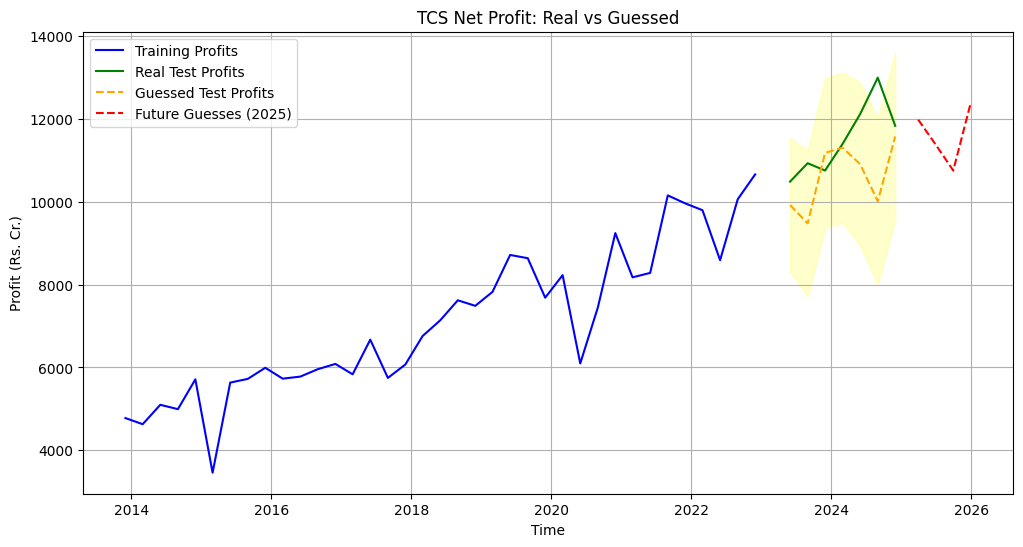


Guessed Profits for 2025:
Mar 25: 11980.83 Rs. Cr.
Jun 25: 11380.52 Rs. Cr.
Sep 25: 10752.45 Rs. Cr.
Dec 25: 12398.14 Rs. Cr.


In [1]:
# Step 1: Get our magic toy box ready
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 2: Put your TCS candy profits in a list
data = {
    'Quarter': ['Dec 13', 'Mar 14', 'Jun 14', 'Sep 14', 'Dec 14', 'Mar 15', 'Jun 15', 'Sep 15', 
                'Dec 15', 'Mar 16', 'Jun 16', 'Sep 16', 'Dec 16', 'Mar 17', 'Jun 17', 'Sep 17', 
                'Dec 17', 'Mar 18', 'Jun 18', 'Sep 18', 'Dec 18', 'Mar 19', 'Jun 19', 'Sep 19', 
                'Dec 19', 'Mar 20', 'Jun 20', 'Sep 20', 'Dec 20', 'Mar 21', 'Jun 21', 'Sep 21', 
                'Dec 21', 'Mar 22', 'Jun 22', 'Sep 22', 'Dec 22', 'Mar 23', 'Jun 23', 'Sep 23', 
                'Dec 23', 'Mar 24', 'Jun 24', 'Sep 24', 'Dec 24'],
    'Net Profit': [4776.76, 4628.52, 5096.87, 4991.68, 5711.15, 3457.26, 5633.0, 5723.0, 
                   5991.0, 5728.0, 5778.0, 5958.0, 6084.0, 5833.0, 6670.0, 5746.0, 
                   6069.0, 6756.0, 7136.0, 7620.0, 7486.0, 7823.0, 8714.0, 8636.0, 
                   7683.0, 8227.0, 6096.0, 7448.0, 9242.0, 8174.0, 8281.0, 10152.0, 
                   9959.0, 9795.0, 8588.0, 10059.0, 10659.0, 9800.0, 10484.0, 10929.0, 
                   10753.0, 11393.0, 12115.0, 12994.0, 11832.0]
}

# Step 3: Make it a neat table and set the quarters as time
df = pd.DataFrame(data)
df['Quarter'] = pd.to_datetime(df['Quarter'], format='%b %y')
df.set_index('Quarter', inplace=True)

# Step 4: Split into training (Dec 13 - Dec 22) and testing (Mar 23 - Dec 24)
train_data = df.loc[:'2022-12-31']  # Up to Dec 22 (37 quarters)
test_data = df.loc['2023-03-31':]   # Mar 23 to Dec 24 (8 quarters)

# Step 5: Build our SARIMA toy with training data
model = SARIMAX(train_data['Net Profit'], 
                order=(1, 1, 1),              # AR=1, I=1, MA=1
                seasonal_order=(1, 1, 0, 4),  # Seasonal AR=1, Seasonal I=1, No Seasonal MA, 4 quarters
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()  # Teach the toy with training data

# Step 6: Guess the test period (Mar 23 to Dec 24)
test_forecast = results.get_forecast(steps=len(test_data))
test_predicted = test_forecast.predicted_mean
test_conf_int = test_forecast.conf_int()

# Step 7: Check how good the guesses are
mae = mean_absolute_error(test_data['Net Profit'], test_predicted)
rmse = np.sqrt(mean_squared_error(test_data['Net Profit'], test_predicted))
print(f"MAE (Average Oops): {mae:.2f} Rs. Cr.")
print(f"RMSE (Big Oops): {rmse:.2f} Rs. Cr.")

# Step 8: Guess the future (Mar 25 to Dec 25)
future_forecast = results.get_forecast(steps=len(test_data) + 4)  # Test + 4 more
future_predicted = future_forecast.predicted_mean[-4:]  # Last 4 are 2025
future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')

# Step 9: Draw the picture!
plt.figure(figsize=(12, 6))  # Big and fun
plt.plot(train_data.index, train_data['Net Profit'], label='Training Profits', color='blue')  # Blue for training
plt.plot(test_data.index, test_data['Net Profit'], label='Real Test Profits', color='green')  # Green for real test
plt.plot(test_data.index, test_predicted, label='Guessed Test Profits', color='orange', linestyle='--')  # Orange guesses
plt.plot(future_dates, future_predicted, label='Future Guesses (2025)', color='red', linestyle='--')  # Red for 2025
plt.fill_between(test_data.index, test_conf_int.iloc[:, 0], test_conf_int.iloc[:, 1], color='yellow', alpha=0.2)  # Yellow "maybe" zone
plt.title('TCS Net Profit: Real vs Guessed')
plt.xlabel('Time')
plt.ylabel('Profit (Rs. Cr.)')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Show the 2025 guesses
print("\nGuessed Profits for 2025:")
for date, value in zip(future_dates, future_predicted):
    print(f"{date.strftime('%b %y')}: {value:.2f} Rs. Cr.")

with AR changed

c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\rayya\AppData\Local\Temp\ipykernel_8848\1250471606.py:56: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')


MAE (Average Oops): 1037.69 Rs. Cr.
RMSE (Big Oops): 1430.45 Rs. Cr.


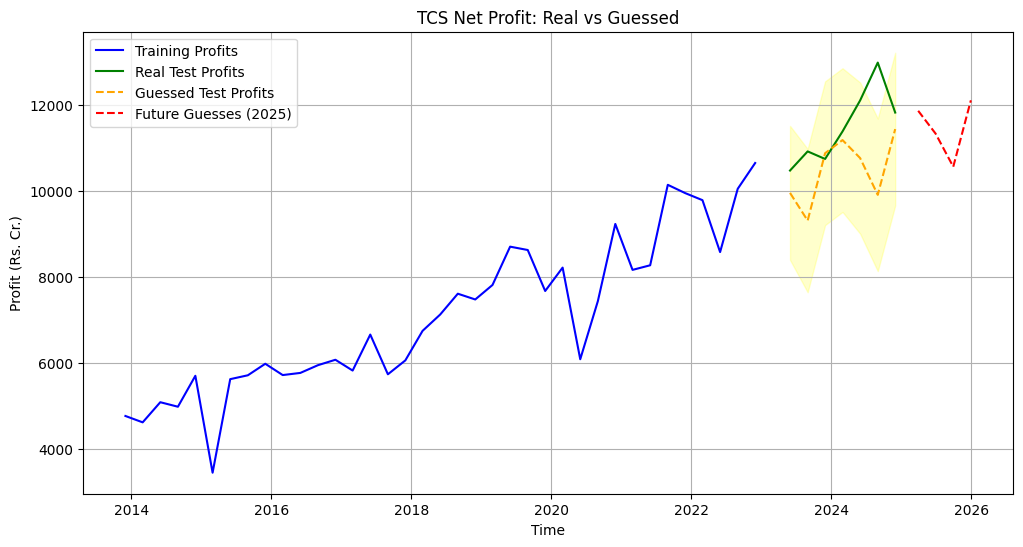


Guessed Profits for 2025:
Mar 25: 11873.12 Rs. Cr.
Jun 25: 11341.41 Rs. Cr.
Sep 25: 10572.23 Rs. Cr.
Dec 25: 12116.81 Rs. Cr.


In [2]:
# Step 1: Get our magic toy box ready
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 2: Put your TCS candy profits in a list
data = {
    'Quarter': ['Dec 13', 'Mar 14', 'Jun 14', 'Sep 14', 'Dec 14', 'Mar 15', 'Jun 15', 'Sep 15', 
                'Dec 15', 'Mar 16', 'Jun 16', 'Sep 16', 'Dec 16', 'Mar 17', 'Jun 17', 'Sep 17', 
                'Dec 17', 'Mar 18', 'Jun 18', 'Sep 18', 'Dec 18', 'Mar 19', 'Jun 19', 'Sep 19', 
                'Dec 19', 'Mar 20', 'Jun 20', 'Sep 20', 'Dec 20', 'Mar 21', 'Jun 21', 'Sep 21', 
                'Dec 21', 'Mar 22', 'Jun 22', 'Sep 22', 'Dec 22', 'Mar 23', 'Jun 23', 'Sep 23', 
                'Dec 23', 'Mar 24', 'Jun 24', 'Sep 24', 'Dec 24'],
    'Net Profit': [4776.76, 4628.52, 5096.87, 4991.68, 5711.15, 3457.26, 5633.0, 5723.0, 
                   5991.0, 5728.0, 5778.0, 5958.0, 6084.0, 5833.0, 6670.0, 5746.0, 
                   6069.0, 6756.0, 7136.0, 7620.0, 7486.0, 7823.0, 8714.0, 8636.0, 
                   7683.0, 8227.0, 6096.0, 7448.0, 9242.0, 8174.0, 8281.0, 10152.0, 
                   9959.0, 9795.0, 8588.0, 10059.0, 10659.0, 9800.0, 10484.0, 10929.0, 
                   10753.0, 11393.0, 12115.0, 12994.0, 11832.0]
}

# Step 3: Make it a neat table and set the quarters as time
df = pd.DataFrame(data)
df['Quarter'] = pd.to_datetime(df['Quarter'], format='%b %y')
df.set_index('Quarter', inplace=True)

# Step 4: Split into training (Dec 13 - Dec 22) and testing (Mar 23 - Dec 24)
train_data = df.loc[:'2022-12-31']  # Up to Dec 22 (37 quarters)
test_data = df.loc['2023-03-31':]   # Mar 23 to Dec 24 (8 quarters)

# Same setup as before, just change this part:
model = SARIMAX(train_data['Net Profit'], 
                order=(2, 1, 1),              # AR=2 instead of 1
                seasonal_order=(1, 1, 1, 4),  # Add Seasonal MA=1
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()
# Rest of the code stays the same!

# Step 6: Guess the test period (Mar 23 to Dec 24)
test_forecast = results.get_forecast(steps=len(test_data))
test_predicted = test_forecast.predicted_mean
test_conf_int = test_forecast.conf_int()

# Step 7: Check how good the guesses are
mae = mean_absolute_error(test_data['Net Profit'], test_predicted)
rmse = np.sqrt(mean_squared_error(test_data['Net Profit'], test_predicted))
print(f"MAE (Average Oops): {mae:.2f} Rs. Cr.")
print(f"RMSE (Big Oops): {rmse:.2f} Rs. Cr.")

# Step 8: Guess the future (Mar 25 to Dec 25)
future_forecast = results.get_forecast(steps=len(test_data) + 4)  # Test + 4 more
future_predicted = future_forecast.predicted_mean[-4:]  # Last 4 are 2025
future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')

# Step 9: Draw the picture!
plt.figure(figsize=(12, 6))  # Big and fun
plt.plot(train_data.index, train_data['Net Profit'], label='Training Profits', color='blue')  # Blue for training
plt.plot(test_data.index, test_data['Net Profit'], label='Real Test Profits', color='green')  # Green for real test
plt.plot(test_data.index, test_predicted, label='Guessed Test Profits', color='orange', linestyle='--')  # Orange guesses
plt.plot(future_dates, future_predicted, label='Future Guesses (2025)', color='red', linestyle='--')  # Red for 2025
plt.fill_between(test_data.index, test_conf_int.iloc[:, 0], test_conf_int.iloc[:, 1], color='yellow', alpha=0.2)  # Yellow "maybe" zone
plt.title('TCS Net Profit: Real vs Guessed')
plt.xlabel('Time')
plt.ylabel('Profit (Rs. Cr.)')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Show the 2025 guesses
print("\nGuessed Profits for 2025:")
for date, value in zip(future_dates, future_predicted):
    print(f"{date.strftime('%b %y')}: {value:.2f} Rs. Cr.")

MAE (Average Oops): 889.77 Rs. Cr.
RMSE (Big Oops): 1256.61 Rs. Cr.


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\rayya\AppData\Local\Temp\ipykernel_8848\2108819690.py:55: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')


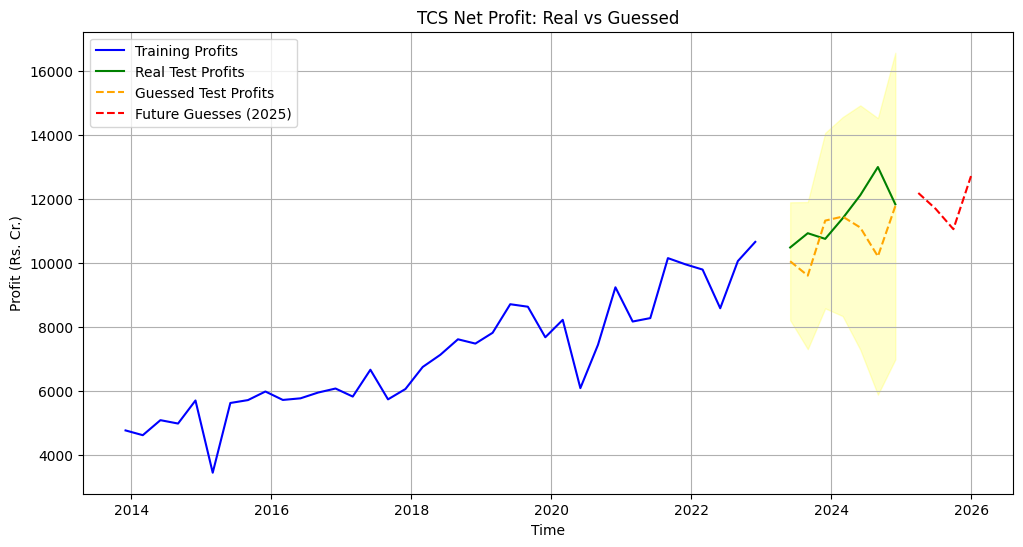


Guessed Profits for 2025:
Mar 25: 12184.19 Rs. Cr.
Jun 25: 11686.34 Rs. Cr.
Sep 25: 11055.19 Rs. Cr.
Dec 25: 12712.13 Rs. Cr.


In [3]:
# Step 1: Get our magic toy box ready
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 2: TCS candy profits list
data = {
    'Quarter': ['Dec 13', 'Mar 14', 'Jun 14', 'Sep 14', 'Dec 14', 'Mar 15', 'Jun 15', 'Sep 15', 
                'Dec 15', 'Mar 16', 'Jun 16', 'Sep 16', 'Dec 16', 'Mar 17', 'Jun 17', 'Sep 17', 
                'Dec 17', 'Mar 18', 'Jun 18', 'Sep 18', 'Dec 18', 'Mar 19', 'Jun 19', 'Sep 19', 
                'Dec 19', 'Mar 20', 'Jun 20', 'Sep 20', 'Dec 20', 'Mar 21', 'Jun 21', 'Sep 21', 
                'Dec 21', 'Mar 22', 'Jun 22', 'Sep 22', 'Dec 22', 'Mar 23', 'Jun 23', 'Sep 23', 
                'Dec 23', 'Mar 24', 'Jun 24', 'Sep 24', 'Dec 24'],
    'Net Profit': [4776.76, 4628.52, 5096.87, 4991.68, 5711.15, 3457.26, 5633.0, 5723.0, 
                   5991.0, 5728.0, 5778.0, 5958.0, 6084.0, 5833.0, 6670.0, 5746.0, 
                   6069.0, 6756.0, 7136.0, 7620.0, 7486.0, 7823.0, 8714.0, 8636.0, 
                   7683.0, 8227.0, 6096.0, 7448.0, 9242.0, 8174.0, 8281.0, 10152.0, 
                   9959.0, 9795.0, 8588.0, 10059.0, 10659.0, 9800.0, 10484.0, 10929.0, 
                   10753.0, 11393.0, 12115.0, 12994.0, 11832.0]
}

# Step 3: Neat table with time
df = pd.DataFrame(data)
df['Quarter'] = pd.to_datetime(df['Quarter'], format='%b %y')
df.set_index('Quarter', inplace=True)

# Step 4: Split training (Dec 13 - Dec 22) and testing (Mar 23 - Dec 24)
train_data = df.loc[:'2022-12-31']  # 37 quarters
test_data = df.loc['2023-03-31':]   # 8 quarters

# Step 5: Try a simpler SARIMA toy: (1,1,0)(1,1,0,4)
model = SARIMAX(train_data['Net Profit'], 
                order=(1, 1, 0),              # AR=1, I=1, No MA
                seasonal_order=(1, 1, 0, 4),  # Seasonal AR=1, Seasonal I=1, No Seasonal MA
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()  # Teach it

# Step 6: Guess the test period
test_forecast = results.get_forecast(steps=len(test_data))
test_predicted = test_forecast.predicted_mean
test_conf_int = test_forecast.conf_int()

# Step 7: Check the “oops” scores
mae = mean_absolute_error(test_data['Net Profit'], test_predicted)
rmse = np.sqrt(mean_squared_error(test_data['Net Profit'], test_predicted))
print(f"MAE (Average Oops): {mae:.2f} Rs. Cr.")
print(f"RMSE (Big Oops): {rmse:.2f} Rs. Cr.")

# Step 8: Guess 2025 for fun
future_forecast = results.get_forecast(steps=len(test_data) + 4)
future_predicted = future_forecast.predicted_mean[-4:]
future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')

# Step 9: Draw it!
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Net Profit'], label='Training Profits', color='blue')
plt.plot(test_data.index, test_data['Net Profit'], label='Real Test Profits', color='green')
plt.plot(test_data.index, test_predicted, label='Guessed Test Profits', color='orange', linestyle='--')
plt.plot(future_dates, future_predicted, label='Future Guesses (2025)', color='red', linestyle='--')
plt.fill_between(test_data.index, test_conf_int.iloc[:, 0], test_conf_int.iloc[:, 1], color='yellow', alpha=0.2)
plt.title('TCS Net Profit: Real vs Guessed')
plt.xlabel('Time')
plt.ylabel('Profit (Rs. Cr.)')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Show 2025 guesses
print("\nGuessed Profits for 2025:")
for date, value in zip(future_dates, future_predicted):
    print(f"{date.strftime('%b %y')}: {value:.2f} Rs. Cr.")

MAE (Average Oops): 1201.18 Rs. Cr.
RMSE (Big Oops): 1614.79 Rs. Cr.


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\rayya\AppData\Local\Temp\ipykernel_8848\3190348878.py:55: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')


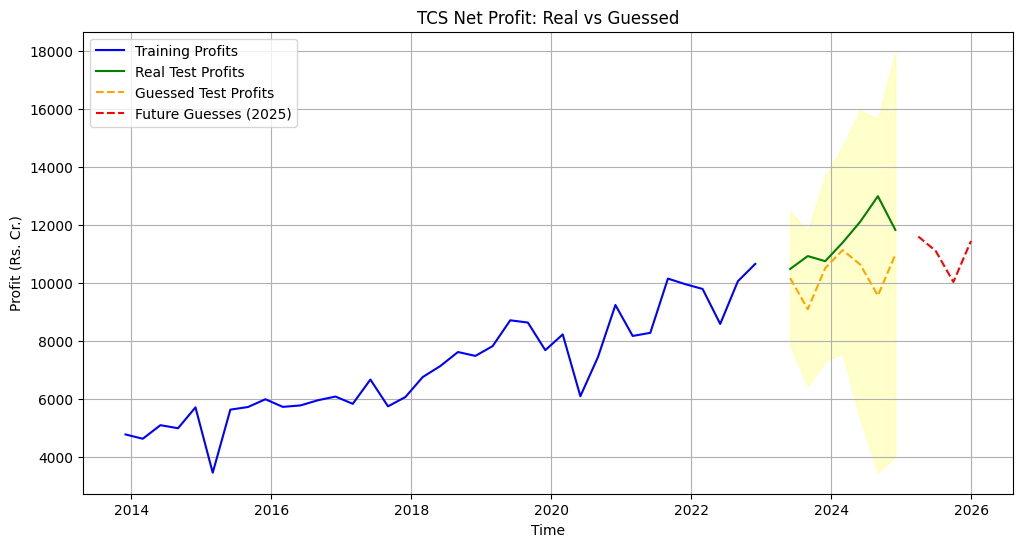


Guessed Profits for 2025:
Mar 25: 11603.48 Rs. Cr.
Jun 25: 11103.58 Rs. Cr.
Sep 25: 10034.79 Rs. Cr.
Dec 25: 11448.92 Rs. Cr.


In [5]:
# Step 1: Magic toy box
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 2: TCS profits
data = {
    'Quarter': ['Dec 13', 'Mar 14', 'Jun 14', 'Sep 14', 'Dec 14', 'Mar 15', 'Jun 15', 'Sep 15', 
                'Dec 15', 'Mar 16', 'Jun 16', 'Sep 16', 'Dec 16', 'Mar 17', 'Jun 17', 'Sep 17', 
                'Dec 17', 'Mar 18', 'Jun 18', 'Sep 18', 'Dec 18', 'Mar 19', 'Jun 19', 'Sep 19', 
                'Dec 19', 'Mar 20', 'Jun 20', 'Sep 20', 'Dec 20', 'Mar 21', 'Jun 21', 'Sep 21', 
                'Dec 21', 'Mar 22', 'Jun 22', 'Sep 22', 'Dec 22', 'Mar 23', 'Jun 23', 'Sep 23', 
                'Dec 23', 'Mar 24', 'Jun 24', 'Sep 24', 'Dec 24'],
    'Net Profit': [4776.76, 4628.52, 5096.87, 4991.68, 5711.15, 3457.26, 5633.0, 5723.0, 
                   5991.0, 5728.0, 5778.0, 5958.0, 6084.0, 5833.0, 6670.0, 5746.0, 
                   6069.0, 6756.0, 7136.0, 7620.0, 7486.0, 7823.0, 8714.0, 8636.0, 
                   7683.0, 8227.0, 6096.0, 7448.0, 9242.0, 8174.0, 8281.0, 10152.0, 
                   9959.0, 9795.0, 8588.0, 10059.0, 10659.0, 9800.0, 10484.0, 10929.0, 
                   10753.0, 11393.0, 12115.0, 12994.0, 11832.0]
}

# Step 3: Neat table
df = pd.DataFrame(data)
df['Quarter'] = pd.to_datetime(df['Quarter'], format='%b %y')
df.set_index('Quarter', inplace=True)

# Step 4: Split train/test
train_data = df.loc[:'2022-12-31']  # Dec 13 - Dec 22
test_data = df.loc['2023-03-31':]   # Mar 23 - Dec 24

# Step 5: SARIMA tweak: (1,1,0)(0,1,0,4)
model = SARIMAX(train_data['Net Profit'], 
                order=(1, 1, 0),              # AR=1, I=1, No MA
                seasonal_order=(0, 1, 0, 4),  # No Seasonal AR, Seasonal I=1, No Seasonal MA
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

# Step 6: Test guesses
test_forecast = results.get_forecast(steps=len(test_data))
test_predicted = test_forecast.predicted_mean
test_conf_int = test_forecast.conf_int()

# Step 7: Oops scores
mae = mean_absolute_error(test_data['Net Profit'], test_predicted)
rmse = np.sqrt(mean_squared_error(test_data['Net Profit'], test_predicted))
print(f"MAE (Average Oops): {mae:.2f} Rs. Cr.")
print(f"RMSE (Big Oops): {rmse:.2f} Rs. Cr.")

# Step 8: Future guesses
future_forecast = results.get_forecast(steps=len(test_data) + 4)
future_predicted = future_forecast.predicted_mean[-4:]
future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')

# Step 9: Draw it
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Net Profit'], label='Training Profits', color='blue')
plt.plot(test_data.index, test_data['Net Profit'], label='Real Test Profits', color='green')
plt.plot(test_data.index, test_predicted, label='Guessed Test Profits', color='orange', linestyle='--')
plt.plot(future_dates, future_predicted, label='Future Guesses (2025)', color='red', linestyle='--')
plt.fill_between(test_data.index, test_conf_int.iloc[:, 0], test_conf_int.iloc[:, 1], color='yellow', alpha=0.2)
plt.title('TCS Net Profit: Real vs Guessed')
plt.xlabel('Time')
plt.ylabel('Profit (Rs. Cr.)')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: 2025 guesses
print("\nGuessed Profits for 2025:")
for date, value in zip(future_dates, future_predicted):
    print(f"{date.strftime('%b %y')}: {value:.2f} Rs. Cr.")

MAE (Average Oops): 997.31 Rs. Cr.
RMSE (Big Oops): 1365.53 Rs. Cr.


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\rayya\AppData\Local\Temp\ipykernel_8848\977396809.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')


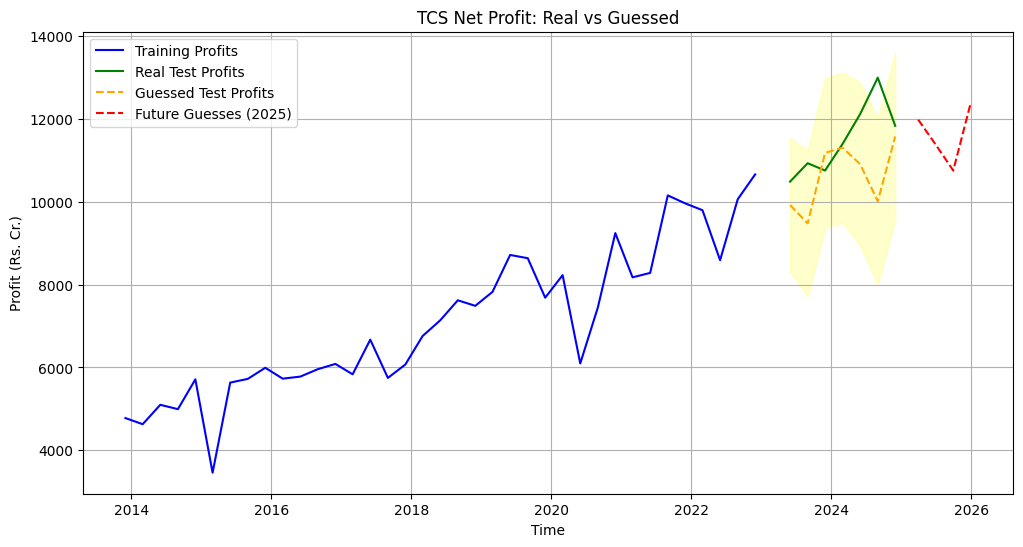


Guessed Profits for 2025:
Mar 25: 11980.83 Rs. Cr.
Jun 25: 11380.52 Rs. Cr.
Sep 25: 10752.45 Rs. Cr.
Dec 25: 12398.14 Rs. Cr.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# TCS data
data = {
    'Quarter': ['Dec 13', 'Mar 14', 'Jun 14', 'Sep 14', 'Dec 14', 'Mar 15', 'Jun 15', 'Sep 15', 
                'Dec 15', 'Mar 16', 'Jun 16', 'Sep 16', 'Dec 16', 'Mar 17', 'Jun 17', 'Sep 17', 
                'Dec 17', 'Mar 18', 'Jun 18', 'Sep 18', 'Dec 18', 'Mar 19', 'Jun 19', 'Sep 19', 
                'Dec 19', 'Mar 20', 'Jun 20', 'Sep 20', 'Dec 20', 'Mar 21', 'Jun 21', 'Sep 21', 
                'Dec 21', 'Mar 22', 'Jun 22', 'Sep 22', 'Dec 22', 'Mar 23', 'Jun 23', 'Sep 23', 
                'Dec 23', 'Mar 24', 'Jun 24', 'Sep 24', 'Dec 24'],
    'Net Profit': [4776.76, 4628.52, 5096.87, 4991.68, 5711.15, 3457.26, 5633.0, 5723.0, 
                   5991.0, 5728.0, 5778.0, 5958.0, 6084.0, 5833.0, 6670.0, 5746.0, 
                   6069.0, 6756.0, 7136.0, 7620.0, 7486.0, 7823.0, 8714.0, 8636.0, 
                   7683.0, 8227.0, 6096.0, 7448.0, 9242.0, 8174.0, 8281.0, 10152.0, 
                   9959.0, 9795.0, 8588.0, 10059.0, 10659.0, 9800.0, 10484.0, 10929.0, 
                   10753.0, 11393.0, 12115.0, 12994.0, 11832.0]
}

# Table setup
df = pd.DataFrame(data)
df['Quarter'] = pd.to_datetime(df['Quarter'], format='%b %y')
df.set_index('Quarter', inplace=True)

# Split
train_data = df.loc[:'2022-12-31']
test_data = df.loc['2023-03-31':]

# SARIMA: (1,1,1)(1,1,0,4)
model = SARIMAX(train_data['Net Profit'], 
                order=(1, 1, 1),              # AR=1, I=1, MA=1
                seasonal_order=(1, 1, 0, 4),  # Seasonal AR=1, Seasonal I=1, No Seasonal MA
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

# Test predictions
test_forecast = results.get_forecast(steps=len(test_data))
test_predicted = test_forecast.predicted_mean
test_conf_int = test_forecast.conf_int()

# Scores
mae = mean_absolute_error(test_data['Net Profit'], test_predicted)
rmse = np.sqrt(mean_squared_error(test_data['Net Profit'], test_predicted))
print(f"MAE (Average Oops): {mae:.2f} Rs. Cr.")
print(f"RMSE (Big Oops): {rmse:.2f} Rs. Cr.")

# Future guesses
future_forecast = results.get_forecast(steps=len(test_data) + 4)
future_predicted = future_forecast.predicted_mean[-4:]
future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Net Profit'], label='Training Profits', color='blue')
plt.plot(test_data.index, test_data['Net Profit'], label='Real Test Profits', color='green')
plt.plot(test_data.index, test_predicted, label='Guessed Test Profits', color='orange', linestyle='--')
plt.plot(future_dates, future_predicted, label='Future Guesses (2025)', color='red', linestyle='--')
plt.fill_between(test_data.index, test_conf_int.iloc[:, 0], test_conf_int.iloc[:, 1], color='yellow', alpha=0.2)
plt.title('TCS Net Profit: Real vs Guessed')
plt.xlabel('Time')
plt.ylabel('Profit (Rs. Cr.)')
plt.legend()
plt.grid(True)
plt.show()

# 2025 guesses
print("\nGuessed Profits for 2025:")
for date, value in zip(future_dates, future_predicted):
    print(f"{date.strftime('%b %y')}: {value:.2f} Rs. Cr.")